# Proyek Analisis Data: orders_dataset.csv
- **Nama:** Annida Syamsa Hawa
- **Email:** annidasyamsa2@gmail.com
- **ID Dicoding:** annidasyamsa

## Menentukan Pertanyaan Bisnis

- Berapa lama rata-rata waktu pengiriman pesanan?
- Kapan periode dengan pesanan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd # membaca dan mengolah data
import numpy as np # perhitungan numerik
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data yang lebih menarik

## Data Wrangling

### Gathering Data

In [2]:
# membaca dataset
df = pd.read_csv("data/orders_dataset.csv")

# menampilkan 5 baris pertama
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

In [3]:
# mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
# terdapat missing values dan ketidaksesuaian tipe data

In [5]:
# memastikan jumlah missing values
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
# terdapat 160 missing values pada kolom order_approved_at
# terdapat 1783 missing values pada kolom order_delivered_carrier_date
# terdapat 2965 missing values pada kolom order_delivered_customer_date

In [7]:
# mengecek nilai unik
df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [8]:
# cek jumlah duplikasi data
df.duplicated().sum()

np.int64(0)

In [9]:
# cek distribusi status pesanan
df["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [10]:
# cek apakah ada tanggal yang tidak masuk akal
invalid_shipped = df[df["order_delivered_carrier_date"] < df["order_approved_at"]]
invalid_delivered = df[df["order_delivered_customer_date"] < df["order_delivered_carrier_date"]]

print("pesanan dikirim sebelum disetujui:", invalid_shipped.shape[0])
print("pesanan sampai sebelum dikirim:", invalid_delivered.shape[0])

pesanan dikirim sebelum disetujui: 1359
pesanan sampai sebelum dikirim: 23


**Insight:**
- terdapat format yang tidak sesuai pada kolom order_status yang tipe data awalnya object sehingga harus diubah ke category agar lebih efisien dan menghemat memori
- terdapat format yang tidak sesuai pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date sehingga harus diubah ke format datetime
- terdapat missing values di kolom =
 order_approved_at,
 order_delivered_carrier_date,
 order_delivered_customer_date
- status pesanan kolom created dan approved memiliki jumlah yang sangat sedikit
- terdapat innacurate value pada pesanan dikirim sebelum disetujui dan pesanan sampai sebelum dikirim


### Cleaning Data

In [11]:
# mengubah format yang tidak sesuai

# mengubah tipe data objek pada order_status menjadi category
df["order_status"] = df["order_status"].astype("category")

In [12]:
# mengubah format tanggal menjadi datetime

date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")

In [13]:
# memeriksa ulang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [14]:
# menangani missing values dengan metode forward fill untuk tanggal pengiriman
df["order_approved_at"] = df["order_approved_at"].ffill()
df["order_delivered_carrier_date"] = df["order_delivered_carrier_date"].ffill()
df["order_delivered_customer_date"] = df["order_delivered_customer_date"].ffill()

In [15]:
# mengecek missing values
print(df[["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"]].isnull().sum())

order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [17]:
# menghapus kolom order_status yang tidak relevan
# karena status tersebut menunjukkan bahwa pesanan belum selesai diproses atau tidak berlanjut ke tahap pengiriman
df = df[~df["order_status"].isin(["created", "approved"])]

In [18]:
# membuat kolom delivery_duration
df["delivery_duration"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

In [19]:
# menangani nilai yang tidak masuk akal
df = df[(df["delivery_duration"] >= 0) & (df["delivery_duration"] <= 60)]

In [20]:
# menangani innacurate value

# hapus pesanan yang dikirim sebelum disetujui
df = df[df["order_delivered_carrier_date"] >= df["order_approved_at"]]

# hapus pesanan yang sampai sebelum dikirim
df = df[df["order_delivered_customer_date"] >= df["order_delivered_carrier_date"]]

In [21]:
# cek ulang
invalid_shipped = df[df["order_delivered_carrier_date"] < df["order_approved_at"]]
invalid_delivered = df[df["order_delivered_customer_date"] < df["order_delivered_carrier_date"]]

print("pesanan dikirim sebelum disetujui:", invalid_shipped.shape[0])
print("pesanan sampai sebelum dikirim:", invalid_delivered.shape[0])

pesanan dikirim sebelum disetujui: 0
pesanan sampai sebelum dikirim: 0


In [22]:
# mendeteksi dan menangani outlier dengan IQR

In [23]:
# menghitung IQR
Q1 = df["delivery_duration"].quantile(0.25)
Q3 = df["delivery_duration"].quantile(0.75)
IQR = Q3 - Q1

# menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# menghapus outlier
df = df[(df["delivery_duration"] >= lower_bound) & (df["delivery_duration"] <= upper_bound)]

# cek hasil
df["delivery_duration"].describe()

count    90194.000000
mean        10.608444
std          6.068378
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         28.000000
Name: delivery_duration, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90194 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       90194 non-null  object        
 1   customer_id                    90194 non-null  object        
 2   order_status                   90194 non-null  category      
 3   order_purchase_timestamp       90194 non-null  datetime64[ns]
 4   order_approved_at              90194 non-null  datetime64[ns]
 5   order_delivered_carrier_date   90194 non-null  datetime64[ns]
 6   order_delivered_customer_date  90194 non-null  datetime64[ns]
 7   order_estimated_delivery_date  90194 non-null  datetime64[ns]
 8   delivery_duration              90194 non-null  int64         
dtypes: category(1), datetime64[ns](5), int64(1), object(2)
memory usage: 6.3+ MB


In [25]:
# data sudah bersih

**Insight:**
- tipe data objek pada order_status berhasil diubah menjadi category
- mengubah kolom order_purchase_timestamp, order_approved_at order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date menjadi datetime
- menangani missing value pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- menghapus pesanan dengan status "created" dan "approved"
- membuat kolom delivery_duration
- menangani innacurate value
- membersihkan outlier

## Exploratory Data Analysis (EDA)

### Explore 

In [26]:
# menampilkan 5 baris pertama
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


In [27]:
# melihat informasi dataset
df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
count,90194,90194,90194,90194,90194,90194,90194,90194,90194.000000
unique,90194,90194,6,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,90074,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 14:00:25.168558848,2017-12-31 23:28:45.470607872,2018-01-03 14:48:44.939076096,2018-01-11 15:47:42.761591552,2018-01-23 23:32:37.141273088,10.608444
min,NaN,NaN,NaN,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-10 11:58:08.500000,2017-09-10 20:03:59.750000128,2017-09-12 21:44:29.249999872,2017-09-19 21:34:10.750000128,2017-09-29 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-17 15:35:08,2018-01-17 21:33:02,2018-01-19 23:31:17.500000,2018-01-30 11:09:56,2018-02-14 00:00:00,9.000000
75%,NaN,NaN,NaN,2018-05-07 15:01:23,2018-05-08 03:52:40.500000,2018-05-09 14:44:00,2018-05-16 16:48:47.500000,2018-05-29 00:00:00,14.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-31 15:25:00,2018-09-11 00:37:34,2018-10-25 00:00:00,28.000000


In [28]:
# analisis tren waktu pemesanan

Bulan dengan pesanan terbanyak: 2017-11, jumlah pesanan: 6686


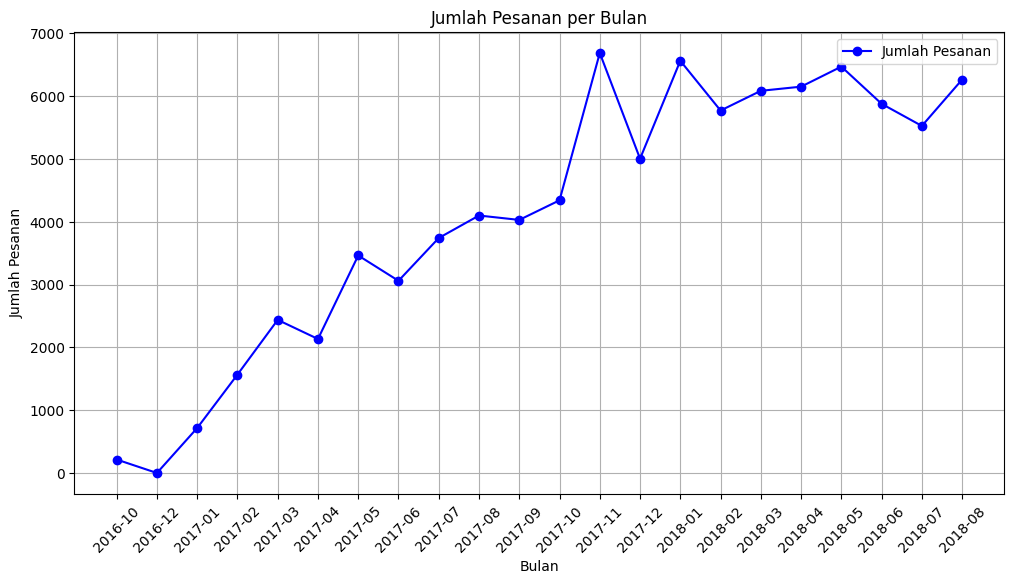

In [29]:
# jumlah pesanan per bulan

# konversi kolom order_purchase_timestamp ke period (bulan)
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# hitung jumlah pesanan per bulan
monthly_orders = df.groupby('order_month').size()

# bulan dengan pesanan terbanyak
max_orders_month = monthly_orders.idxmax()
max_orders_value = monthly_orders.max()

print(f"Bulan dengan pesanan terbanyak: {max_orders_month}, jumlah pesanan: {max_orders_value}")

# visualisasi jumlah pesanan per bulan
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values, marker='o', linestyle='-', color='b', label='Jumlah Pesanan')

# label dan judul
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.title("Jumlah Pesanan per Bulan")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# tampilkan grafik
plt.show()

Hari dengan pesanan terbanyak: Monday (14652 pesanan)


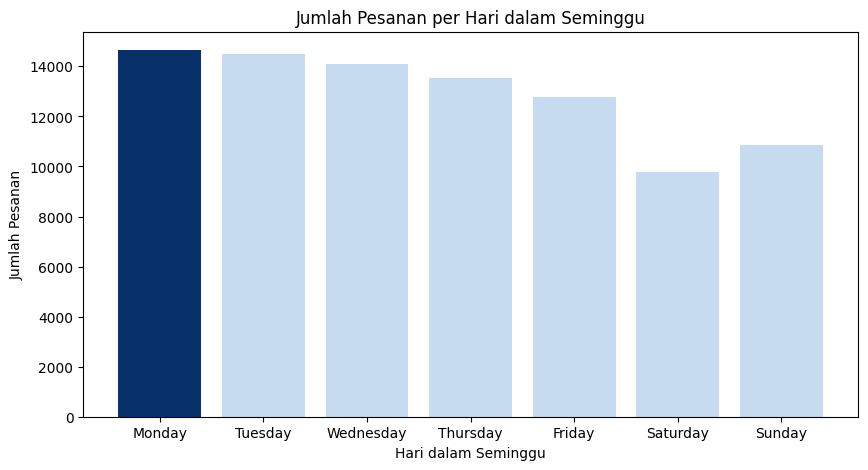

In [30]:
# jumlah pesanan per hari dalam seminggu

# menambahkan kolom nama hari 
df['order_weekday'] = df['order_purchase_timestamp'].dt.day_name()

# hitung jumlah pesanan per hari dalam seminggu
weekday_orders = df['order_weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# menentukan hari dengan jumlah pesanan terbanyak
most_ordered_day = weekday_orders.idxmax()
most_orders_count = weekday_orders.max()

print(f"Hari dengan pesanan terbanyak: {most_ordered_day} ({most_orders_count} pesanan)")

# menentukan warna berdasarkan nilai tertinggi
max_value = weekday_orders.max()
colors = ['#08306b' if value == max_value else '#c6dbef' for value in weekday_orders]  # paling tinggi warna biru tua, lainnya lebih terang

# visualisasi grafik
plt.figure(figsize=(10, 5))
bars = plt.bar(weekday_orders.index, weekday_orders.values, color=colors)

# label dan judul
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Pesanan")
plt.title("Jumlah Pesanan per Hari dalam Seminggu")

# tampilkan grafik
plt.show()

Jam dengan pesanan terbanyak: 16:00 (6074 pesanan)


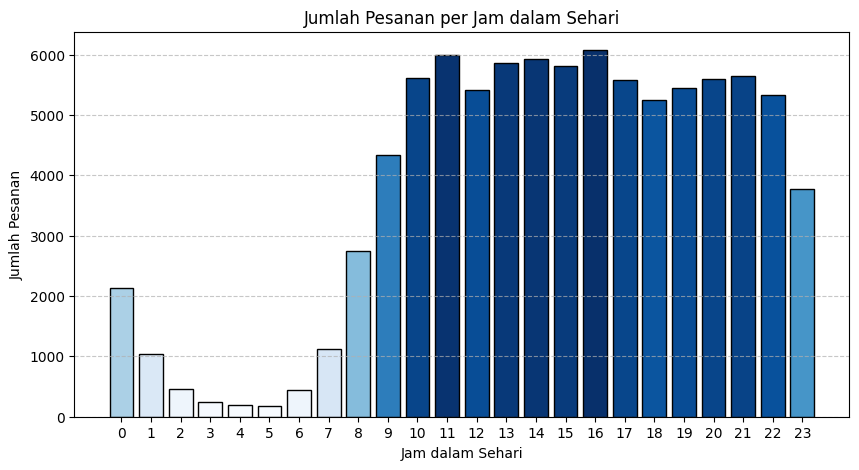

In [31]:
# jumlah pesanan per jam dalam sehari

# menambahkan kolom jam
df['order_hour'] = df['order_purchase_timestamp'].dt.hour

# hitung jumlah pesanan per jam
hourly_orders = df['order_hour'].value_counts().sort_index()

# menampilkan jam dengan pesanan terbanyak
most_ordered_hour = hourly_orders.idxmax()
most_orders_count = hourly_orders.max()
print(f"Jam dengan pesanan terbanyak: {most_ordered_hour}:00 ({most_orders_count} pesanan)")

# membuat warna gradasi berdasarkan jumlah pesanan (paling tinggi paling gelap)
colors = sns.color_palette("Blues", len(hourly_orders))
color_mapping = {hour: colors[i] for i, hour in enumerate(hourly_orders.index)}
bar_colors = [color_mapping[hour] for hour in hourly_orders.index]

# visualisasi
# menentukan warna berdasarkan banyaknya jumlah pesanan
norm = plt.Normalize(hourly_orders.min(), hourly_orders.max())
colors = sns.color_palette("Blues", as_cmap=True)(norm(hourly_orders.values))

plt.figure(figsize=(10, 5))
plt.bar(hourly_orders.index, hourly_orders.values, color=colors, edgecolor="black")

# labeling
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Pesanan")
plt.title("Jumlah Pesanan per Jam dalam Sehari")
plt.xticks(range(24))  # menampilkan semua jam dari 0-23
plt.grid(axis="y", linestyle="--", alpha=0.7)

# tampilkan grafik
plt.show()

Rata-rata waktu pengiriman pesanan: 10.61 hari


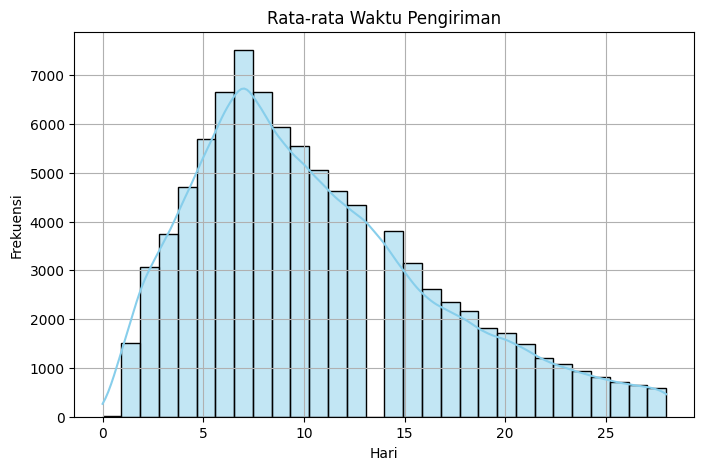

In [32]:
# rata-rata waktu pengiriman
avg_delivery_time = df['delivery_duration'].mean()
print(f"Rata-rata waktu pengiriman pesanan: {avg_delivery_time:.2f} hari")

# visualisasi distribusi waktu pengiriman dengan garis merah untuk rata-rata
plt.figure(figsize=(8, 5))
sns.histplot(df['delivery_duration'], bins=30, kde=True, color='skyblue')

# label dan judul
plt.title("Rata-rata Waktu Pengiriman")
plt.xlabel("Hari")
plt.ylabel("Frekuensi")
plt.grid()

# tampilkan grafik
plt.show()

**Insight:**
- bulan dengan pesanan terbanyak: 2017-11, jumlah pesanan: 6686
- hari dengan pesanan terbanyak: Monday (14652 pesanan)
- jam dengan pesanan terbanyak: 16:00 (6074 pesanan)
- rata-rata waktu pengiriman pesanan: 10.61 hari


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa lama rata-rata waktu pengiriman pesanan?



Rata-rata waktu pengiriman pesanan: 10.61 hari


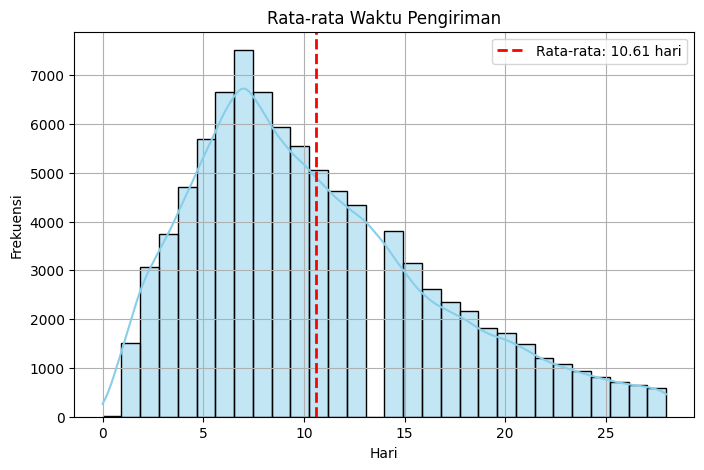

In [33]:
print(f"Rata-rata waktu pengiriman pesanan: {avg_delivery_time:.2f} hari")

# visualisasi rata-rata waktu pengiriman dengan garis merah untuk rata-rata
plt.figure(figsize=(8, 5))
sns.histplot(df['delivery_duration'], bins=30, kde=True, color='skyblue')

# menambahkan garis vertikal untuk rata-rata waktu pengiriman
plt.axvline(avg_delivery_time, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata: {avg_delivery_time:.2f} hari')

# label dan judul
plt.title("Rata-rata Waktu Pengiriman")
plt.xlabel("Hari")
plt.ylabel("Frekuensi")
plt.legend()
plt.grid()

# tampilkan grafik
plt.show()

### Pertanyaan 2: Kapan periode dengan pesanan terbanyak?

Bulan dengan pesanan terbanyak: 2017-11, jumlah pesanan: 6686


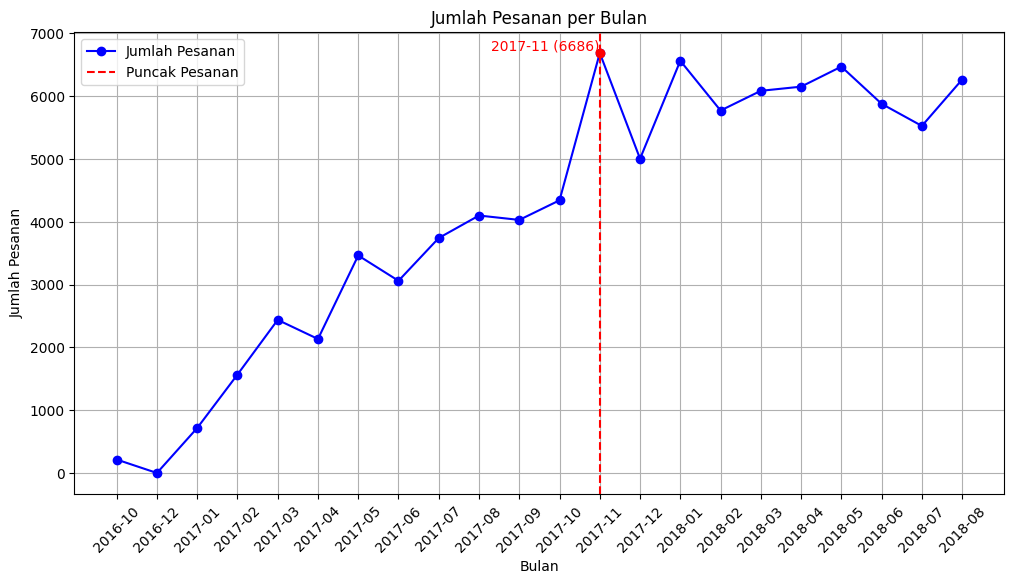

In [34]:
print(f"Bulan dengan pesanan terbanyak: {max_orders_month}, jumlah pesanan: {max_orders_value}")

# visualisasi jumlah pesanan per bulan
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values, marker='o', linestyle='-', color='b', label='Jumlah Pesanan')

# bulan dengan pesanan terbanyak
plt.axvline(str(max_orders_month), color='r', linestyle='dashed', label='Puncak Pesanan')
plt.scatter(str(max_orders_month), max_orders_value, color='red', zorder=3)
plt.text(str(max_orders_month), max_orders_value, f"{max_orders_month} ({max_orders_value})", 
         verticalalignment='bottom', horizontalalignment='right', fontsize=10, color='red')

# label dan judul
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.title("Jumlah Pesanan per Bulan")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# tampilkan grafik
plt.show()

**Insight:**
- grafik menunjukkan distribusi durasi pengiriman yang sesuai dengan rata-rata 10.61 hari
- grafik menunjukkan bahwa periode dengan pesanan terbanyak ada pada bulan November tahun 2017 sebanyak 6.686 pesanan

## Analisis Lanjutan (Opsional)

1. Menggunakan teknik binning untuk mengelompokkan waktu pengiriman ke dalam kategori tertentu. Tujuannya adalah untuk memahami distribusi waktu pengiriman dan mengidentifikasi pola yang dapat membantu dalam meningkatkan pengelolaan logistik.

In [35]:
# menggunakan clustering dengan binning tanpa menggunakan algoritma ML

# kategori waktu pengiriman 
# mengelompokkan waktu pengiriman ke dalam kategori (binning) cepat: 0–3 hari, normal: 4–7 hari, lama: >7 hari
bins = [0, 3, 7, float("inf")]
labels = ["cepat", "normal", "lama"]

df["delivery_category"] = pd.cut(df["delivery_duration"], bins=bins, labels=labels)

# menampilkan jumlah pesanan berdasarkan kategori waktu pengiriman
delivery_distribution = df["delivery_category"].value_counts()
print(delivery_distribution)

delivery_category
lama      57280
normal    24574
cepat      8329
Name: count, dtype: int64


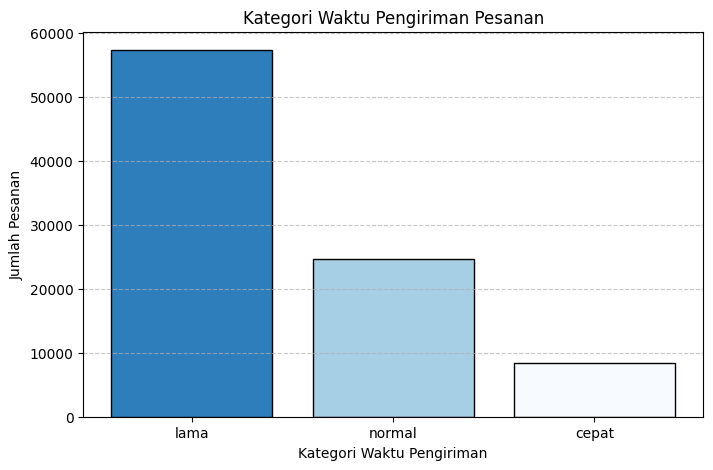

In [36]:
# mengurutkan kategori lama pengiriman 
sorted_categories = delivery_distribution.sort_values(ascending=False)

# gradasi warna dari terang ke gelap berdasarkan jumlah pesanan
colors = plt.cm.Blues_r(np.linspace(0.3, 1, len(sorted_categories)))  # warna paling gelap untuk kategori terbanyak

# visualisasi
plt.figure(figsize=(8, 5))
plt.bar(sorted_categories.index, sorted_categories.values, color=colors, edgecolor="black")

# labeling
plt.xlabel("Kategori Waktu Pengiriman")
plt.ylabel("Jumlah Pesanan")
plt.title("Kategori Waktu Pengiriman Pesanan")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# tampilkan grafik
plt.show()


Berdasarkan analisis data, mayoritas pesanan dikirim dengan waktu yang lama, yaitu sebanyak 57.280 pesanan. Kategori normal memiliki jumlah yang lebih sedikit, yaitu 24.574 pesanan, sementara kategori cepat memiliki jumlah paling sedikit, yaitu hanya 8.329 pesanan. Hal ini menunjukkan bahwa sebagian besar pesanan membutuhkan waktu pengiriman yang cukup panjang. Temuan ini dapat menjadi perhatian bagi pihak logistik untuk mengevaluasi faktor-faktor yang menyebabkan lamanya pengiriman dan mencari solusi untuk meningkatkan efisiensi waktu pengiriman.

2. Menganalisis lama pengiriman dari pembelian hingga diterima pelanggan untuk melihat apakah terdapat variasi besar dalam durasi pengiriman.

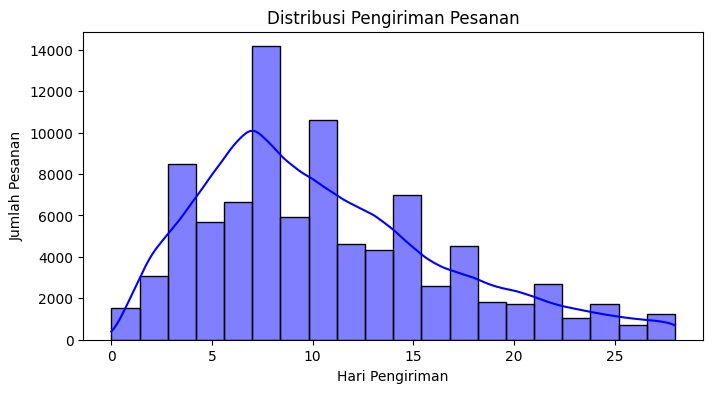

In [37]:
# analisis lama pengiriman dari pembelian - diterima pelanggan

# hitung selisih waktu pengiriman
df["delivery_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# visualisasi distribusi lama pengiriman
plt.figure(figsize=(8,4))
sns.histplot(df["delivery_days"], bins=20, kde=True, color="blue")
plt.xlabel("Hari Pengiriman")
plt.ylabel("Jumlah Pesanan")
plt.title("Distribusi Pengiriman Pesanan")

# tampilkan grafik
plt.show()

Berdasarkan analisis data, mayoritas pesanan dikirim dalam 5-10 hari, dengan puncak pengiriman di sekitar 8-9 hari. Hal ini menunjukkan bahwa standar waktu pengiriman e-commerce berada dalam kisaran ini. Pengiriman lebih dari 20 hari jarang terjadi, yang bisa disebabkan oleh faktor tertentu seperti kendala logistik atau lokasi pengiriman yang jauh. Sementara itu, meskipun terdapat layanan pengiriman cepat (kurang dari 3 hari), jumlah penggunaannya masih sangat terbatas. Ini bisa menjadi peluang bagi e-commerce atau penyedia logistik untuk meningkatkan aksesibilitas dan daya tarik layanan pengiriman cepat agar menarik untuk pelanggan.

3. Menganalisis apakah waktu pengiriman yang lebih lama berpengaruh pada meningkatnya pembatalan atau refund pesanan.

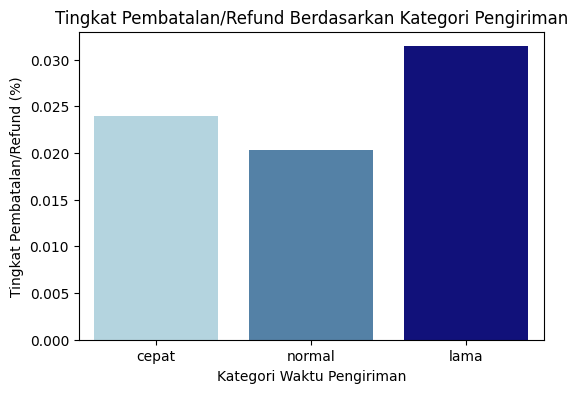

In [38]:
# hubungan waktu pengiriman dengan tingkat pembatalan pesanan

# buat kolom is_canceled_or_refunded
df["is_canceled_or_refunded"] = (df["order_status"] == "canceled").astype(int) 

# hitung rata-rata pembatalan atau refund per kategori pengiriman
cancel_refund_rate = df.groupby("delivery_category", observed=True)["is_canceled_or_refunded"].mean() * 100

# visualisasi hasil
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x=cancel_refund_rate.index,
    y=cancel_refund_rate.values,
    hue=cancel_refund_rate.index,  # hue sesuai kategori
    palette=["lightblue", "steelblue", "darkblue"],
    legend=False  # sembunyikan legend karena sudah tergambar dalam warna
)
plt.xlabel("Kategori Waktu Pengiriman")
plt.ylabel("Tingkat Pembatalan/Refund (%)")
plt.title("Tingkat Pembatalan/Refund Berdasarkan Kategori Pengiriman")

# tampilkan grafik
plt.show()

Berdasarkan analisis data, semakin lama waktu pengiriman, semakin tinggi kemungkinan pesanan dibatalkan. Ini menunjukkan bahwa pelanggan cenderung tidak sabar menunggu terlalu lama. Untuk mengurangi tingkat pembatalan, perusahaan bisa memperbaiki sistem logistik atau menyediakan opsi pengiriman lebih cepat.

## Conclusion

- Berapa lama rata-rata waktu pengiriman pesanan?

Dari hasil perhitungan delivery_duration, rata-rata waktu pengiriman pesanan adalah sekitar 10.61 hari. Hal ini menunjukkan bahwa sebagian besar pesanan dikirim dalam rentang waktu tersebut. Faktor-faktor yang dapat mempengaruhi durasi pengiriman meliputi lokasi pelanggan, jenis layanan pengiriman, dan efisiensi logistik.

- Kapan periode dengan pesanan terbanyak?

Berdasarkan analisis jumlah pesanan per bulan, periode dengan jumlah pesanan terbanyak terjadi pada November 2017, dengan total 6.686 pesanan. Kemungkinan besar lonjakan ini terjadi karena adanya event spesial, seperti diskon besar atau momen liburan yang meningkatkan jumlah pembelian.
Tren ini dapat dimanfaatkan oleh penjual untuk meningkatkan stok dan strategi pemasaran pada periode yang sama di tahun berikutnya.

## Insight yang didapat dari setiap tahapan analisis yang telah dilakukan

1. Assessing Data
- Ditemukan ketidaksesuaian format data pada beberapa kolom, seperti order_status yang perlu dikonversi ke kategori (category) agar lebih efisien dalam penggunaan memori.
- Kolom timestamp seperti order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date perlu dikonversi ke format datetime agar dapat dianalisis dengan lebih akurat.
- Missing values ditemukan pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date, yang dapat memengaruhi analisis lebih lanjut.
- Jumlah pesanan dengan status "created" dan "approved" sangat sedikit, sehingga kurang relevan untuk analisis lebih lanjut.
- Ditemukan nilai yang tidak akurat, seperti pesanan yang dikirim sebelum disetujui atau pesanan yang sampai sebelum dikirim.

2. Cleaning Data
- Data telah dibersihkan dengan mengubah order_status menjadi tipe kategori (category).
- Kolom-kolom timestamp berhasil dikonversi ke format datetime untuk mempermudah analisis waktu.
- Missing values telah ditangani, sehingga tidak mengganggu hasil analisis.
- Pesanan dengan status "created" dan "approved" telah dihapus, karena jumlahnya sangat sedikit dan tidak memberikan informasi signifikan.
- Kolom delivery_duration dibuat untuk menghitung waktu pengiriman pesanan.
- Nilai yang tidak akurat telah diperbaiki, termasuk pesanan yang memiliki timestamp tidak logis.
- Outlier dalam data telah dibersihkan, sehingga hasil analisis menjadi lebih akurat.

3. Exploratory Data Analysis (EDA)
- Bulan dengan pesanan terbanyak: November 2017 (6.686 pesanan).
- Hari dengan pesanan terbanyak: Senin (14.652 pesanan).
- Jam dengan pesanan terbanyak: Pukul 16:00 (6.074 pesanan).
- Rata-rata waktu pengiriman pesanan: 10,61 hari.

4. Visualization & Explanatory Data Analysis
- Visualisasi menunjukkan bahwa distribusi durasi pengiriman sesuai dengan rata-rata 10,61 hari.
- Visualisasi menunjukkan bahwa puncak pesanan terjadi pada bulan November 2017 dengan jumlah 6.686 pesanan, kemungkinan besar dipengaruhi oleh event diskon atau momen liburan.

5. Analisis Lanjutan
- Mayoritas pesanan dikirim dalam waktu yang lama (57.280 pesanan) dibandingkan dengan kategori normal (24.574 pesanan) dan cepat (8.329 pesanan).
- Sebagian besar pesanan dikirim dalam waktu 5-10 hari, dengan puncak di sekitar 8-9 hari.
- Pengiriman lebih dari 20 hari jarang terjadi, yang mungkin disebabkan oleh kendala logistik atau jarak pengiriman yang jauh.
- Pengiriman cepat (<3 hari) masih sangat terbatas, tetapi dapat menjadi peluang bagi e-commerce dan penyedia logistik untuk meningkatkan layanan agar lebih menarik bagi pelanggan.
- Semakin lama waktu pengiriman, semakin tinggi kemungkinan pesanan dibatalkan, menunjukkan bahwa pelanggan cenderung tidak sabar menunggu terlalu lama. Optimalisasi logistik dan opsi pengiriman lebih cepat dapat membantu menekan angka pembatalan pesanan.


## Solusi dan Rekomendasi

1. Meningkatkan efisiensi logistik

- Mengvaluasi faktor keterlambatan pengiriman dengan meninjau mitra logistik dan jalur distribusi.
- Mengoptimalkan gudang penyimpanan dengan menempatkan stok di lokasi strategis untuk mempercepat proses pengiriman.
- Tingkatkan koordinasi antara e-commerce dan ekspedisi untuk mengurangi keterlambatan pengiriman.

2. Mengurangi pembatalan pesanan

- Sediakan opsi pengiriman lebih cepat, misalnya layanan same-day delivery atau express shipping untuk pelanggan yang menginginkan pengiriman instan.
- Memberikan estimasi waktu pengiriman yang lebih akurat saat checkout untuk mengelola ekspektasi pelanggan.

3. Memanfaatkan tren musiman

- Mempersiapkan stok dan logistik menjelang bulan dengan pesanan tertinggi (November) agar dapat menangani lonjakan permintaan dengan lebih baik.
- Meningkatkan promosi dan diskon di jam sibuk (pukul 16:00) dan hari Senin untuk memaksimalkan penjualan.

4. Meningkatkan customer experience

- Sediakan fitur pelacakan pesanan real-time agar pelanggan bisa memantau progres pengiriman dan mengurangi kekhawatiran keterlambatan.
- Gunakan notifikasi pada aplikasi pemesanan untuk menginformasikan keterlambatan dan solusinya.

5. Meningkatkan penggunaan layanan pengiriman cepat

- Tawarkan subsidi biaya pengiriman ekspres untuk meningkatkan penggunaan layanan tersebut.

In [38]:
# menambahkan kode untuk menyimpan berkas data yang telah dibersihkan
df.to_csv("main_data.csv", index=False)

In [39]:
# simpan CSV
df.to_csv("main_data.csv", index=False)